# <div style="background:rgba(53, 144, 235, 0.64); padding: 18px; border-radius: 12px; font-size: 0.8em; margin-bottom: 16px; color: #ffffffff; font-weight: bold;"> Visualización de Datos con Matplotlib y Seaborn

</div>

**¡Bienvenido!**

Este tutorial es ideal para cualquiera que quiera iniciarse en el mundo de la visualizacion en <b>Matplotlib</b> y <b>Seaborn</b>. Presenta técnicas y ejemplos de los contenidos tratados en Python for Data Analysis 3rd Ed. - Chapter 9. Plotting and Visualization.


<div style="background:#E8F0FE; border-left: 5px solid rgba(53, 144, 235, 0.64); padding: 12px; margin-bottom: 16px; color:#181818;">
La visualización de datos es una herramienta esencial en el análisis moderno. Permite transformar tablas y números en representaciones visuales que facilitan la identificación de tendencias, patrones y anomalías.
</div>

En este tutorial se abordará:
1. **Las Bases:** Matplotlib
2. **El Lienzo:** Figuras y Ejes
3. **Contar la Historia:** Títulos, Etiquetas y Leyendas
4. **El Atajo:** Pandas
5. **El Experto:** Seaborn

### **Requisitos**

Para usar este notebook se recomienda crear un entorno virtual de Python e instalar las librerías que se encuentran en el archivo `requirements.txt`. Esto mantiene aisladas las dependencias del proyecto y evita conflictos con otras instalaciones.

#### Con pip

Crear el entorno virtual:

```bash
python -m venv .venv
```

Activar el entorno:

- En Linux / macOS

  ```bash
  source .venv/bin/activate
  ```

- En Windows (PowerShell)

  ```bash
  .venv\Scripts\Activate
  ```

Instalar dependencias:

```bash
pip install -r requirements.txt
```

#### Con [uv](https://docs.astral.sh/uv/getting-started/)

```bash
uv sync   # Instalar dependencias definidas en pyproject.toml
```


### **Importación de Librerías**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

plt.rc("figure", figsize=(8, 6))

## <div style="background:rgba(48, 216, 154, 0.65); padding: 18px; border-radius: 12px; font-size: 0.8em; margin-bottom: 16px; color: #ffffffff; font-weight: bold;"> 🌱 1. Las Bases: Matplotlib
</div>

**Explicación**
- **Matplotlib** es la biblioteca base de la mayoría de librerías de visualización en Python.  
- Permite un **control completo** de figuras, ejes, estilos, colores, anotaciones y más. Ideal cuando se necesita **personalización fina** o gráficos muy específicos.   
- A veces puede ser **verbosa** y requerir más líneas de código que otras opciones.

Por ejemplo:

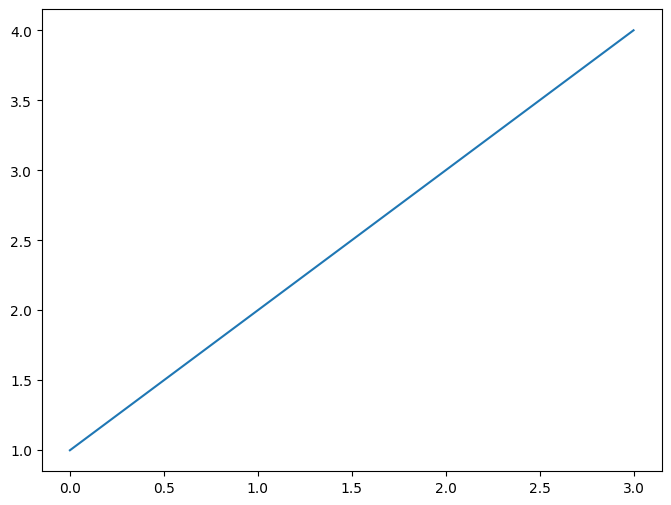

In [2]:
plt.plot([1, 2, 3, 4])
plt.show()

## <div style="background:rgba(160, 48, 216, 0.46); padding: 18px; border-radius: 12px; font-size: 0.8em; margin-bottom: 16px; color: #ffffffff; font-weight: bold;"> 🎨 2. El Lienzo: Figuras y Ejes
</div>

**Explicación:**
- `Figure`: representa el **lienzo completo** donde se organizan los gráficos.  
- `Axes`: son los **espacios de dibujo individuales** dentro de la figura, donde realmente se trazan los datos.  
- Una `Figure` puede contener uno o varios `Axes` (subplots organizados en filas y columnas).  
- Este enfoque ofrece **más control y personalización** que el modo rápido (`plt.plot()` directo).  

Por ejemplo:

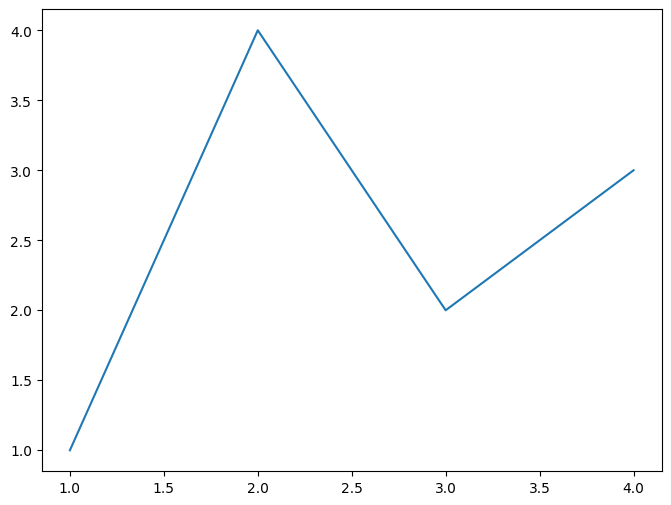

In [3]:
fig, ax = plt.subplots()  # Crea una figura con un solo eje
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Graficar datos
plt.show()

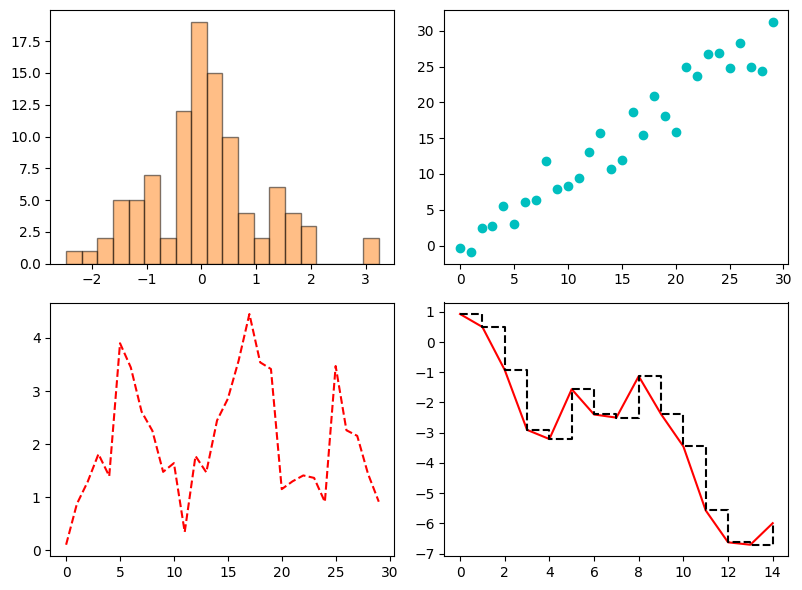

In [4]:
# Paso 1: Crear el lienzo principal (Figure)
fig = plt.figure()

# Paso 2: Agregar 4 subgráficos en una cuadrícula 2x2
ax1 = fig.add_subplot(2, 2, 1)  # Primer cuadrante
ax2 = fig.add_subplot(2, 2, 2)  # Segundo cuadrante
ax3 = fig.add_subplot(2, 2, 3)  # Tercer cuadrante
ax4 = fig.add_subplot(2, 2, 4)  # Cuarto cuadrante

# Paso 3: Dibujar diferentes tipos de gráficos en cada subgráfico
# Histograma en el primer subgráfico
ax1.hist(
    np.random.standard_normal(100), bins=20, color="C1", alpha=0.5, edgecolor="black"
)

# Gráfico de dispersión en el segundo subgráfico
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30), color="c")

# Gráfico lineal en el tercer subgráfico
ax3.plot(np.random.standard_normal(30).cumsum(), color="#FF0000", linestyle="dashed")

# Gráficos lineales superpuestos en el cuarto subgráfico
data = np.random.standard_normal(15).cumsum()
ax4.plot(data, color="red", label="Línea principal")
ax4.plot(
    data,
    color="black",
    linestyle="dashed",
    drawstyle="steps-post",
    label="Línea escalonada",
)

# Ajustar el espacio entre subgráficos para mejor visualización
plt.tight_layout()

# Mostrar la figura completa
plt.show()

## <div style="background:rgba(48, 73, 216, 0.65); padding: 18px; border-radius: 12px; font-size: 0.8em; margin-bottom: 16px; color: #ffffffff; font-weight: bold;"> 📖 3. Storytelling: Títulos, Etiquetas y Leyendas
</div>

**Explicación**

- Un gráfico sin títulos ni etiquetas es solo una imagen sin contexto.  
- Los **títulos** permiten presentar de qué trata la visualización.  
- Las **etiquetas de los ejes** (x, y) explican qué significan los valores representados.  
- Los **ticks y sus etiquetas** ayudan a interpretar escalas y magnitudes.  
- Las **leyendas** identifican qué representa cada línea, barra o categoría.  
- Todos estos elementos juntos convierten al gráfico en una **historia clara y comprensible**, no solo en un dibujo.

Por ejemplo:

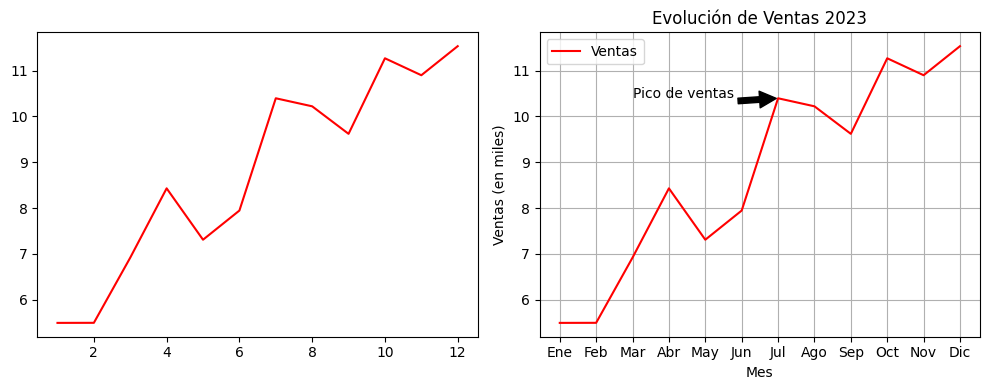

In [5]:
np.random.seed(42)
x = np.arange(1, 13)  # 12 meses
y = np.linspace(5, 12, 12) + np.random.randn(12)  # tendencia ascendente con ruido

# Crear figura con dos subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# --- Gráfico 1: solo la línea ---
axes[0].plot(x, y, "r-")

# --- Gráfico 2: con toda la info ---
axes[1].plot(x, y, "r-", label="Ventas")
axes[1].set_title("Evolución de Ventas 2023")
axes[1].set_xlabel("Mes")
axes[1].set_ylabel("Ventas (en miles)")
axes[1].set_xticks(x)
axes[1].set_xticklabels(
    ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
)
axes[1].legend()
axes[1].grid(True)
axes[1].annotate(
    "Pico de ventas",
    xy=(7, y[6]),
    xytext=(3, y[6]),
    arrowprops=dict(facecolor="black", shrink=0.04),
)

plt.tight_layout()
plt.show()

## <div style="background:rgba(247, 203, 29, 0.62); padding: 18px; border-radius: 12px; font-size: 0.8em; margin-bottom: 16px; color: #ffffffff; font-weight: bold;"> ⚡ 4. El Atajo: Pandas
</div>

**Explicación:**

- Pandas nos permite graficar directamente los **DataFrames**, sin necesidad de transformar los datos.
- Tiene una **sintaxis concisa**, mucho más corta que Matplotlib puro.
- Es **ideal para análisis exploratorio**, ya que permite crear gráficos rápidos y claros para entender patrones y tendencias en los datos.


<div style="background: #fff8ceff; border-left: 5px solid rgba(255, 229, 82, 0.64); padding: 12px; margin-bottom: 12px; color: #181818;">
Las tablas permiten observar datos precisos, pero pueden dificultar la interpretación cuando la información es abundante. Los gráficos, en cambio, facilitan la identificación de patrones, tendencias y relaciones de manera visual y eficiente.
</div>


In [6]:
# Cargamos el dataset de vinos incluido en sklearn
wine = load_wine(as_frame=True)

# Seleccionamos algunas columnas numéricas para analizar
data = wine.frame[["alcohol", "ash", "total_phenols", "color_intensity"]]

# Mostramos las primeras filas para ver la estructura de los datos
data.head()

,alcohol,ash,total_phenols,color_intensity
0,14.23,2.43,2.80,5.64
1,13.20,2.14,2.65,4.38
2,13.16,2.67,2.80,5.68
3,14.37,2.50,3.85,7.80
4,13.24,2.87,2.80,4.32


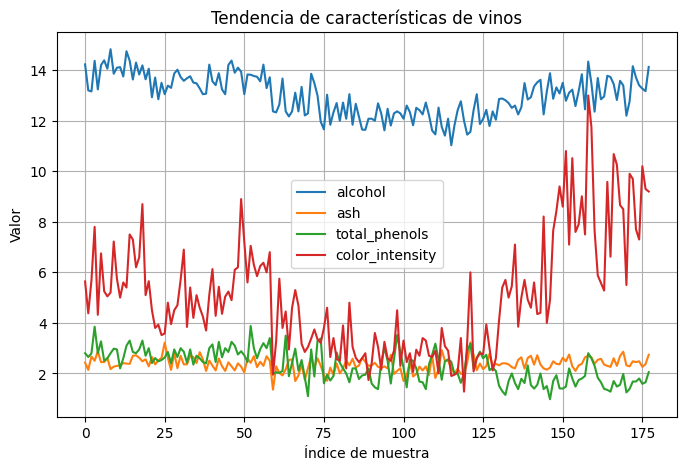

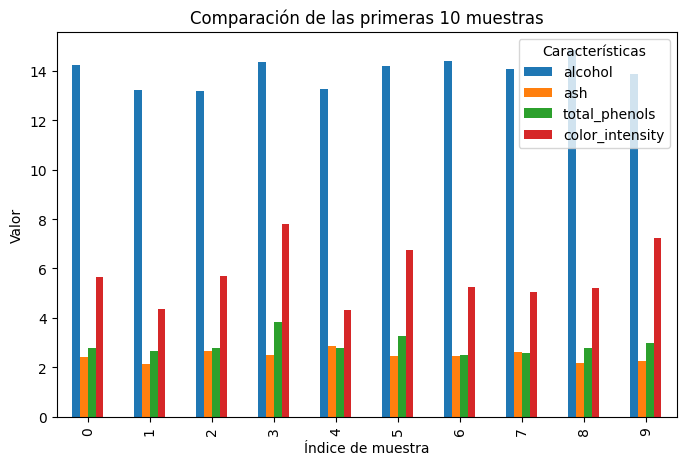

In [7]:
# --- Gráfico 1: líneas de las columnas ---
data.plot(figsize=(8, 5), title="Tendencia de características de vinos")
plt.xlabel("Índice de muestra")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

# --- Gráfico 2: barras de los primeros 10 vinos para cada columna ---
data.head(10).plot(
    kind="bar", figsize=(8, 5), title="Comparación de las primeras 10 muestras"
)
plt.xlabel("Índice de muestra")
plt.ylabel("Valor")
plt.legend(title="Características")
plt.show()

## <div style="background:rgba(216, 48, 48, 0.65); padding: 18px; border-radius: 12px; font-size: 0.8em; margin-bottom: 16px; color: #ffffffff; font-weight: bold;"> 🧑‍🎨 5. El Experto: Seaborn
</div>

**Explicación:**

- Seaborn ofrece un **estilo visual atractivo por defecto**, con colores y diseños agradables.  
- Proporciona **funciones de alto nivel** que simplifican la creación de gráficos complejos, como distribuciones, correlaciones y facetas.  
- Es **ideal para análisis estadístico**, permitiendo visualizar relaciones entre variables de manera rápida y clara.

Por ejemplo:

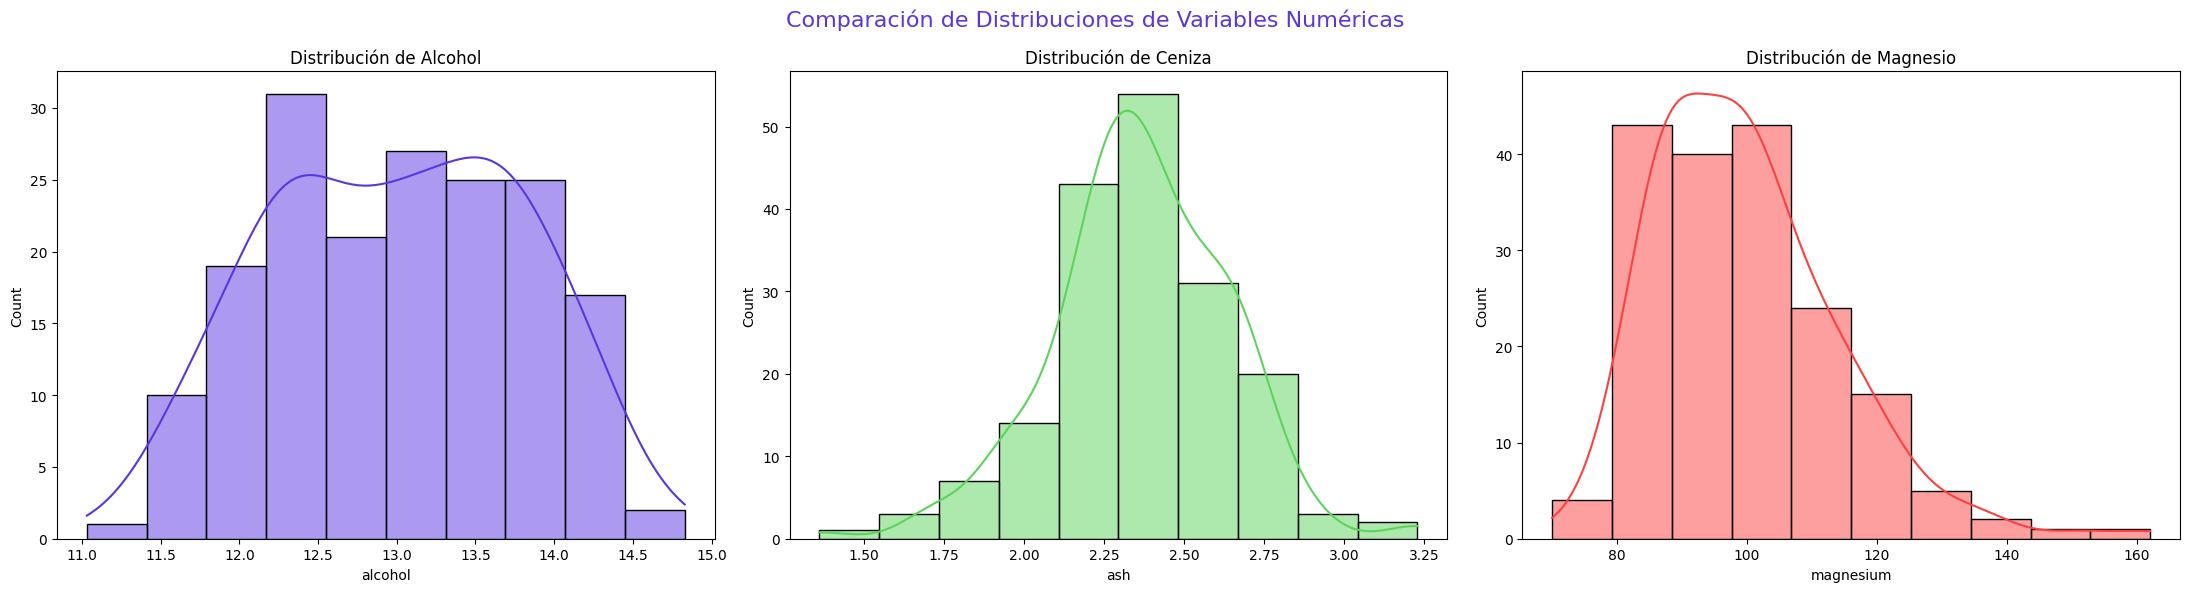

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))
# ['alcohol', 'ash', 'total_phenols', 'color_intensity']
data = wine.frame[["alcohol", "ash", "total_phenols", "color_intensity", "magnesium"]]

# Histograma de alcohol
sns.histplot(
    ax=axes[0], x=data["alcohol"], bins=10, kde=True, cbar=True, color="#5A35E2"
).set(title="Distribución de Alcohol")

# Histograma de ceniza
sns.histplot(
    ax=axes[1], x=data["ash"], bins=10, cbar=True, kde=True, color="#5CD45C"
).set(title="Distribución de Ceniza")

# Histograma de magnesio
sns.histplot(
    ax=axes[2], x=data["magnesium"], bins=10, kde=True, cbar=True, color="#FD4040"
).set(title="Distribución de Magnesio")

plt.suptitle(
    "Comparación de Distribuciones de Variables Numéricas", fontsize=16, color="#5A35E2"
)
plt.tight_layout()
plt.show()

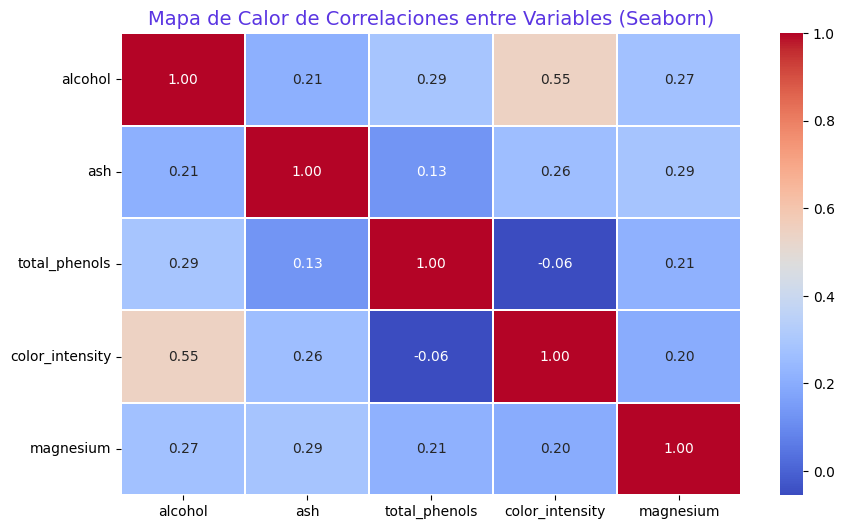

In [9]:
# Calculamos la matriz de correlación entre las variables numéricas
correlation = data.corr()

# Creamos el heatmap con anotaciones y estilo profesional
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation, annot=True, fmt=".2f", linewidths=0.2, cmap="coolwarm", cbar=True
)
plt.title(
    "Mapa de Calor de Correlaciones entre Variables (Seaborn)",
    fontsize=14,
    color="#5A35E2",
)
plt.yticks(rotation=0)
plt.show()

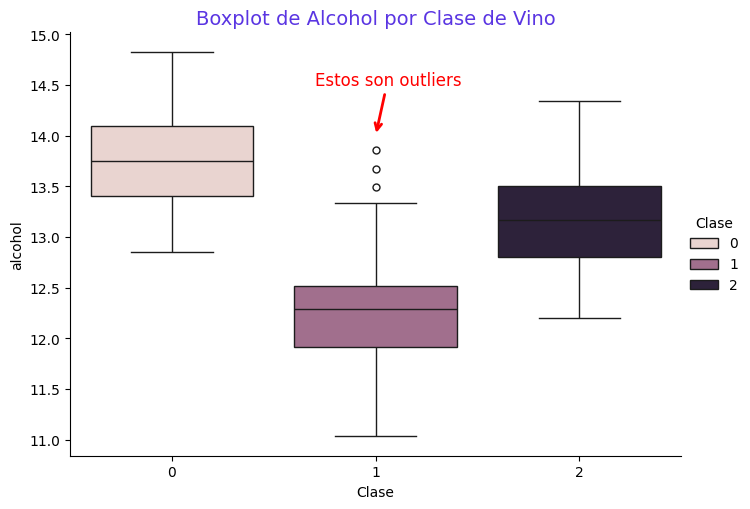

In [10]:
# --- Detección visual de outliers con boxplot ---
# Usamos el dataset completo de vinos
data = wine.frame

# Renombramos la columna target a 'Clase' para mayor claridad
data = data.rename(columns={"target": "Clase"})

# Creamos un boxplot para comparar la variable 'alcohol' entre clases de vino
g = sns.catplot(
    x="Clase", y="alcohol", kind="box", hue="Clase", data=data, height=5, aspect=1.4
)
ax = g.ax

# Agregamos una anotación para señalar los outliers
ax.annotate(
    "Estos son outliers",
    xy=(1, 14),  # Punto al que apunta la flecha
    xytext=(0.7, 14.5),  # Lugar donde empieza el texto
    arrowprops=dict(arrowstyle="->", color="red", lw=2),
    fontsize=12,
    color="red",
    ha="left",
)

plt.title("Boxplot de Alcohol por Clase de Vino", fontsize=14, color="#5A35E2")
plt.show()

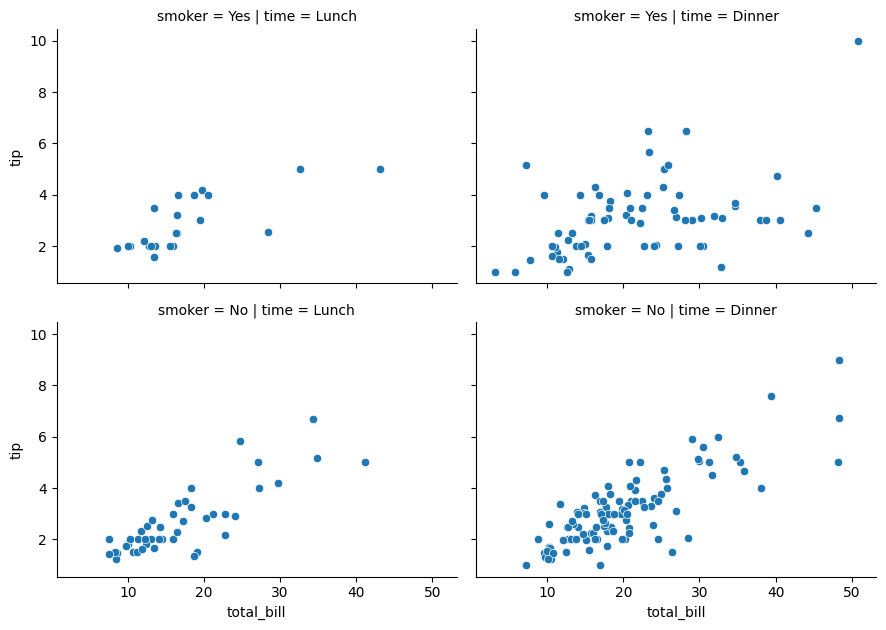

In [3]:
# Cargar dataset
tips = sns.load_dataset("tips")

# Gráfico con relplot
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    col="time",
    row="smoker",
    kind="scatter",
    height=3.2,
    aspect=1.4,
)
plt.show()

<div style="background: rgba(214, 112, 112, 0.65); border-left: 5px solid rgba(216, 48, 48, 0.65); padding: 12px; margin-bottom: 12px; color: #181818;">
🧰 Seaborn: nuestra caja de herramientas
</div>

- Con **pocas líneas de código**, Seaborn nos permite generar una gran variedad de visualizaciones listas para el análisis.  
- Esto hace que explorar, interpretar y **comunicar datos sea mucho más rápido y efectivo**.  
- El siguiente ejemplo muestra, en un solo lienzo, **9 tipos distintos de gráficos**, algunos nuevos y otros ya conocidos, que se pueden construir fácilmente con Seaborn.  
- Es como tener una *caja de herramientas visual* que se adapta al tipo de pregunta que queramos responder.

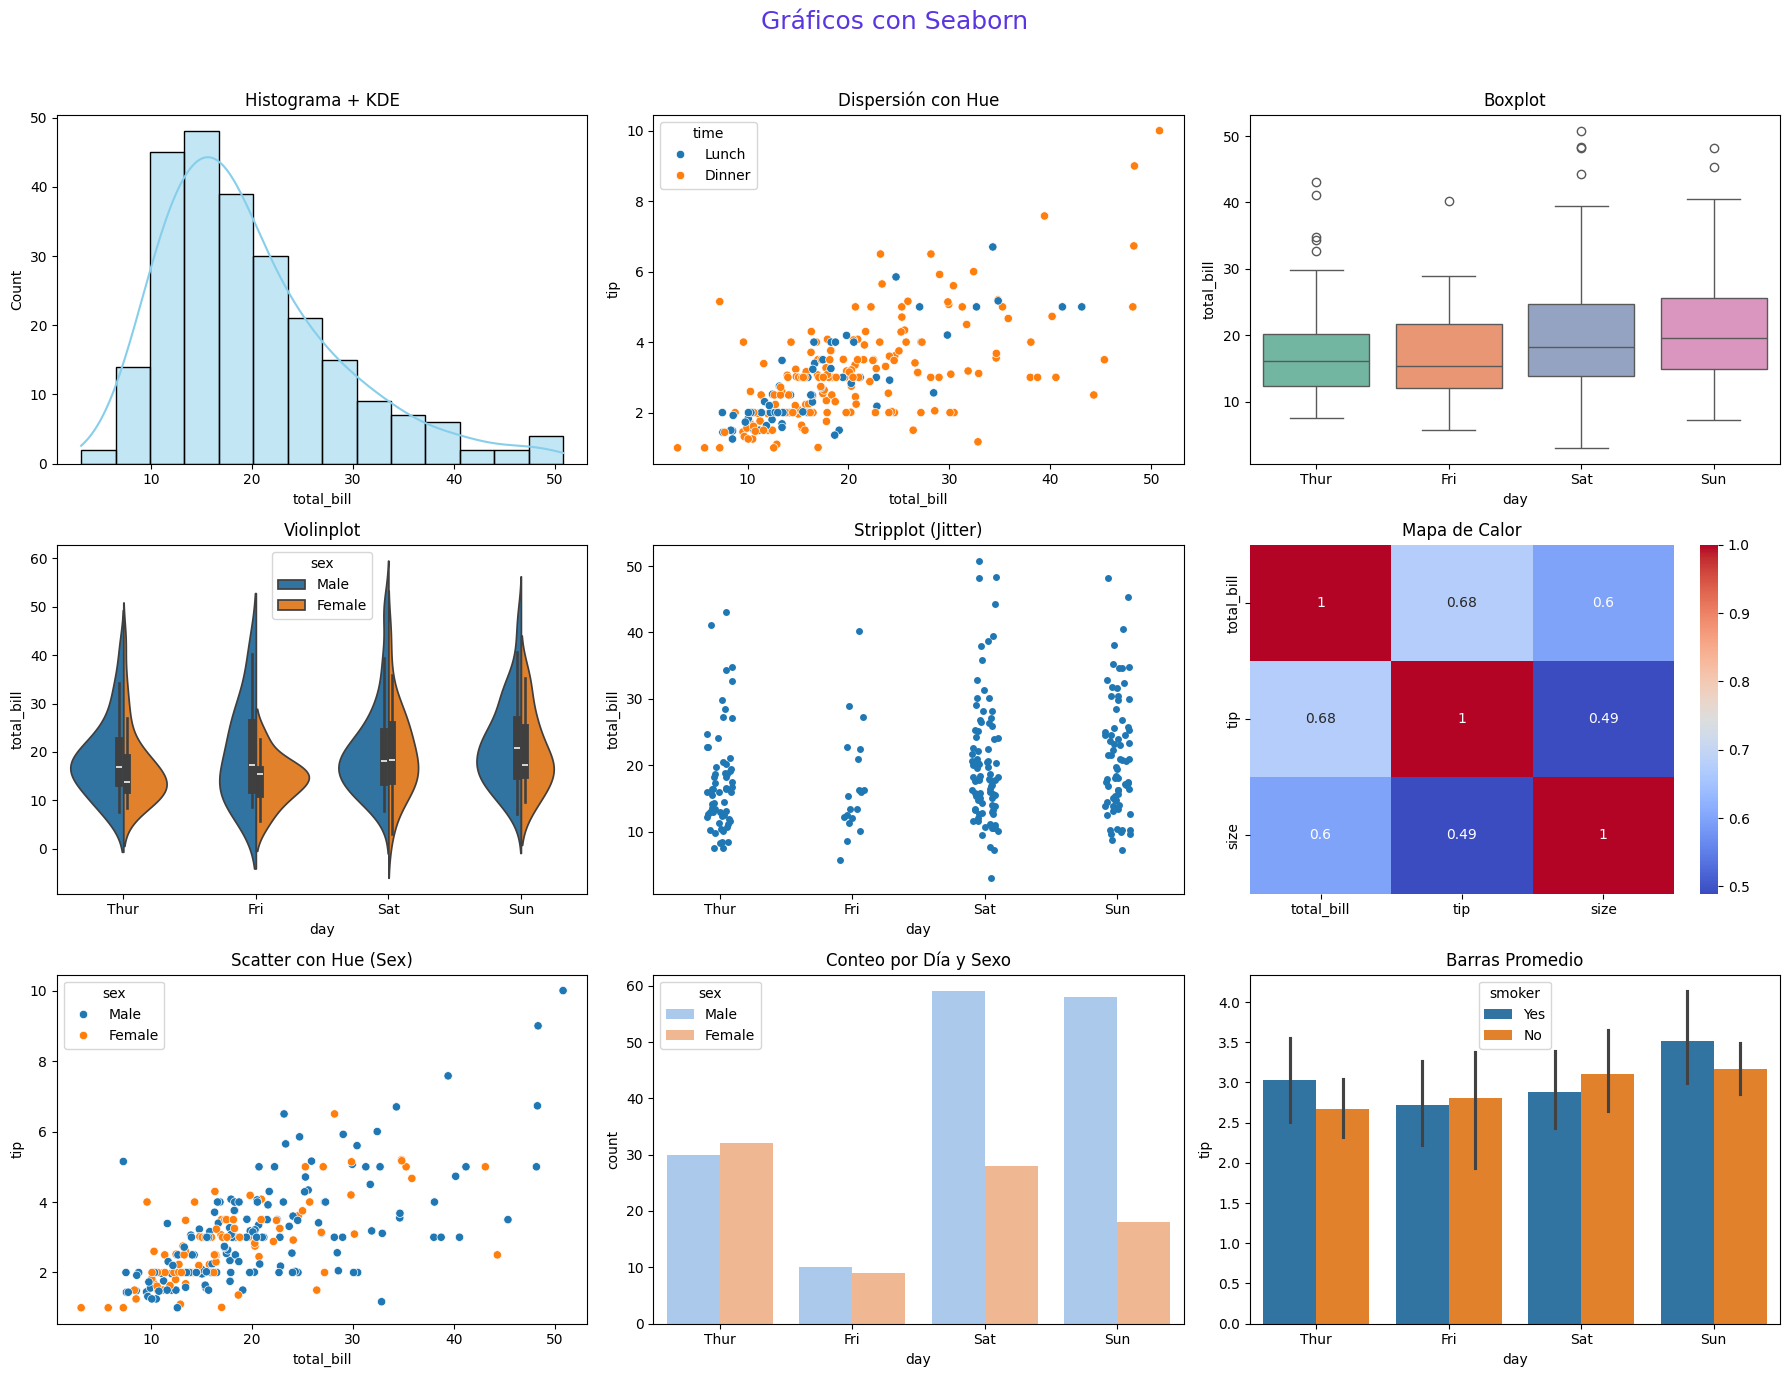

In [ ]:
# Crear lienzo 3x3
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle("Gráficos con Seaborn", fontsize=18, color="#5A35E2")

# 1. Histograma + KDE
sns.histplot(data=tips, x="total_bill", kde=True, ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Histograma + KDE")

# 2. Scatterplot
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", ax=axes[0,1])
axes[0,1].set_title("Dispersión con Hue")

# 3. Boxplot
sns.boxplot(
    data=tips,
    x="day",
    y="total_bill",
    hue="day",
    palette="Set2",
    ax=axes[0,2]
)
axes[0,2].set_title("Boxplot")

# 4. Violinplot
sns.violinplot(data=tips, x="day", y="total_bill", hue="sex", split=True, ax=axes[1,0])
axes[1,0].set_title("Violinplot")

# 5. Stripplot
sns.stripplot(data=tips, x="day", y="total_bill", jitter=True, ax=axes[1,1])
axes[1,1].set_title("Stripplot (Jitter)")

# 6. Heatmap (correlaciones)
corr = tips.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", ax=axes[1,2])
axes[1,2].set_title("Mapa de Calor")

# 7. Scatterplot (mini pairplot)
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex", ax=axes[2,0])
axes[2,0].set_title("Scatter con Hue (Sex)")

# 8. Countplot
sns.countplot(data=tips, x="day", hue="sex", ax=axes[2,1], palette="pastel")
axes[2,1].set_title("Conteo por Día y Sexo")

# 9. Barplot
sns.barplot(data=tips, x="day", y="tip", hue="smoker", ax=axes[2,2])
axes[2,2].set_title("Barras Promedio")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### **Recursos para profundizar**

- **[Documentación oficial de Matplotlib](https://matplotlib.org/stable/contents.html):** Todo acerca de Matplotlib, con ejemplos y referencia completa de la API.
- **[Guía de Seaborn](https://seaborn.pydata.org/tutorial.html):** Tutorial oficial para aprender desde gráficos básicos hasta técnicas avanzadas de visualización estadística.
- **[Fundamentals of Data Visualization - Claus O. Wilke](https://clauswilke.com/dataviz/):** Recurso online para entender los principios de diseño de gráficos efectivos y claros.
- **[Tutorial de Seaborn en DataCamp](https://www.datacamp.com/es/tutorial/seaborn-python-tutorial):** Curso interactivo para practicar la creación de gráficos con Seaborn y explorar datos de manera práctica.
- **[Curso de Visualización en Kaggle](https://www.kaggle.com/learn/data-visualization):** Curso práctico con datasets reales, ideal para aprender visualización de datos en Python paso a paso.


<div style="background:#E8F0FE; border-left: 5px solid rgba(53, 144, 235, 0.64); padding: 12px; margin-bottom: 16px; color:#181818;"> <strong> Extra:</strong>
Con ayuda de la herramienta Notebook LM (Google) generamos un video que explica en menos de 8 minutos lo visto en esta notebook. Es de gran utilidad para poder repasar los conceptos.

<em>Aclaración:</em> En el minuto 5:19 tiene un pequeño error en el gráfico generado. Si bien en el video se menciona que se muestran líneas negras del nivel de confianza, esto no se observa en dicho gráfico. Para ver el gráfico correcto, ir a la página 36 del PDF de <em>Python for Data Analysis, 3rd Ed. - Chapter 9: Plotting and Visualization</em>.

<a href="https://drive.google.com/file/d/1ik1dKWZJueYA2BjYvcD58AMp4EG_2pwa/view?usp=sharing" target="_blank">Video Explicativo</a>

<strong> Issues:</strong>
- [Misleading introductory sentence about sns.histplot behavior](https://github.com/wesm/pydata-book/issues/214)
- [Duplicate matplotlib import and redundant set_title() call](https://github.com/wesm/pydata-book/issues/213)

</div>
